In [13]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import tensorflow as tf
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [14]:
img_size = [224, 224]
train_path="D:/faceshapes in csv/hairtype/train_data"
test_path="D:/faceshapes in csv/hairtype/test_data"

x_train = []
for folder in os.listdir(train_path):
    sub_path = os.path.join(train_path, folder)  # Correctly concatenate the folder path
    for img in os.listdir(sub_path):
        image_path = os.path.join(sub_path, img)
        img_arr = cv2.imread(image_path)
        img_arr = cv2.resize(img_arr, (224, 224))
        x_train.append(img_arr)

x_test = []
for folder in os.listdir(test_path):
    sub_path = os.path.join(test_path, folder)  # Correctly concatenate the folder path
    for img in os.listdir(sub_path):
        image_path = os.path.join(sub_path, img)
        img_arr = cv2.imread(image_path)
        img_arr = cv2.resize(img_arr, (224, 224))
        x_test.append(img_arr)

In [15]:
train_x=np.array(x_train)
test_x=np.array(x_test)

train_x.shape,test_x.shape

((82, 224, 224, 3), (22, 224, 224, 3))

In [16]:
train_x=train_x/255.0
test_x=test_x/255.0

train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 82 images belonging to 3 classes.
Found 22 images belonging to 3 classes.
Found 22 images belonging to 3 classes.


In [17]:
training_set.class_indices

{'Curly Hair': 0, 'Straight Hair': 1, 'Wavy Hair': 2}

In [18]:
train_y=training_set.classes

In [19]:
test_y=test_set.classes

In [20]:
train_y.shape,test_y.shape

((82,), (22,))

In [21]:
# One-hot encode the labels
num_classes = 3
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

In [22]:
# add preprocessing layer to the front of VGG
vgg = VGG19(input_shape=img_size + [3], weights='imagenet', include_top=False)

# don't train existing weights
for layer in vgg.layers:
    layer.trainable = False
    
x = Flatten()(vgg.output)

prediction = Dense(3, activation='softmax')(x)

# create a model object
model = Model(inputs=vgg.input, outputs=prediction)

# view the structure of the model
model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 224, 224, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 224, 224, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 112, 112, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 112, 112, 128)  │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 112, 112, 128)  │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 56, 56, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 56, 56, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv4 (Conv2D)           │ (None, 56, 56, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 28, 28, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 28, 28, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv4 (Conv2D)           │ (None, 28, 28, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 14, 14, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv4 (Conv2D)           │ (None, 14, 14, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 7, 7, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │        75,267 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 20,099,651 (76.67 MB)

 Trainable params: 75,267 (294.01 KB)

 Non-trainable params: 20,024,384 (76.39 MB)

In [23]:
model.compile(
  loss='categorical_crossentropy',
  optimizer=tf.keras.optimizers.RMSprop(learning_rate=1e-4),
  metrics=['accuracy']
)

from tensorflow.keras.callbacks import Callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs=None):
        if logs.get('val_accuracy') is not None and logs.get('val_accuracy') >= 0.80:
            print('\nReached 80% validation accuracy, stopping training!')
            self.model.stop_training = True
            
Callback = myCallback()

#Early stopping to avoid overfitting of model

history = model.fit(
    train_x,
    train_y,
    validation_data=(test_x, test_y),  # Add this line to include validation data
    epochs=50,
    callbacks=[Callback],
    batch_size=32,
    shuffle=True
)

Epoch 1/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 35s 11s/step - accuracy: 0.4070 - loss: 1.1826 - val_accuracy: 0.4545 - val_loss: 1.0159
Epoch 2/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 10s/step - accuracy: 0.5144 - loss: 0.9710 - val_accuracy: 0.5455 - val_loss: 0.9331
Epoch 3/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 10s/step - accuracy: 0.6562 - loss: 0.8001 - val_accuracy: 0.5455 - val_loss: 0.9606
Epoch 4/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 31s 10s/step - accuracy: 0.7035 - loss: 0.7100 - val_accuracy: 0.7273 - val_loss: 0.8634
Epoch 5/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 10s/step - accuracy: 0.8648 - loss: 0.6196 - val_accuracy: 0.5909 - val_loss: 0.9135
Epoch 6/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 28s 10s/step - accuracy: 0.8192 - loss: 0.5524 - val_accuracy: 0.6818 - val_loss: 0.8233
Epoch 7/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 33s 11s/step - accuracy: 0.9222 - loss: 0.5156 - val_accuracy: 0.6818 - val_loss: 0.8061
Epoch 8/50
3/3 ━━━━━━━━━━━━━━━━━━━━ 29s 10s/step - accuracy: 0.9422 - loss: 0.4457 - val_accuracy: 0.6818 - val_loss: 0.8136


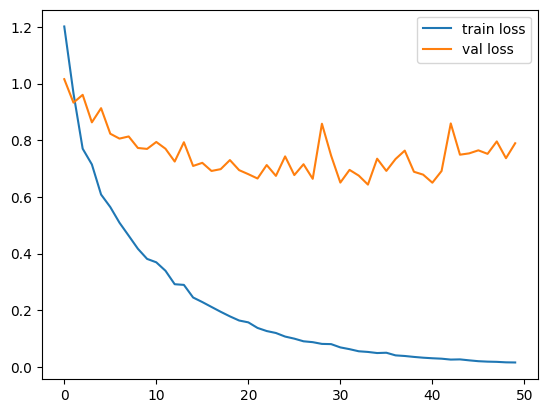

In [24]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()

plt.savefig('vgg-loss-hair-1.png')
plt.show()

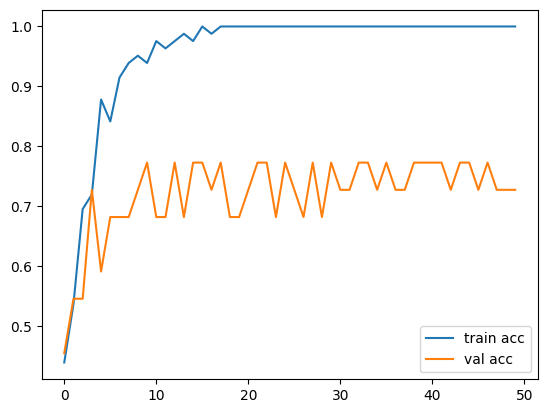

In [25]:
# accuracies
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()

plt.savefig('vgg-acc-hair-1.png')
plt.show()

In [26]:
model.evaluate(test_x,test_y,batch_size=32)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.7273 - loss: 0.7897


[0.7897033095359802, 0.7272727489471436]

In [27]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
import numpy as np

In [28]:
y_pred=model.predict(test_x)
y_pred=np.argmax(y_pred,axis=1)

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step


In [29]:
import numpy as np
from sklearn.metrics import accuracy_score

# Assuming y_pred and test_y are your predictions and true labels

# Convert one-hot encoded labels to class labels if necessary
if test_y.ndim > 1 and test_y.shape[1] > 1:
    test_y = np.argmax(test_y, axis=1)

if y_pred.ndim > 1 and y_pred.shape[1] > 1:
    y_pred = np.argmax(y_pred, axis=1)

# Ensure both are the same type
y_pred = y_pred.astype(int)
test_y = test_y.astype(int)

# Compute accuracy score
accuracy = accuracy_score(y_pred, test_y)
print("Accuracy:", accuracy)

Accuracy: 0.7272727272727273


In [30]:
print(classification_report(y_pred,test_y))

              precision    recall  f1-score   support

           0       0.60      0.75      0.67         4
           1       1.00      0.71      0.83        17
           2       0.20      1.00      0.33         1

    accuracy                           0.73        22
   macro avg       0.60      0.82      0.61        22
weighted avg       0.89      0.73      0.78        22



In [31]:
confusion_matrix(y_pred,test_y)

array([[ 3,  0,  1],
       [ 2, 12,  3],
       [ 0,  0,  1]], dtype=int64)

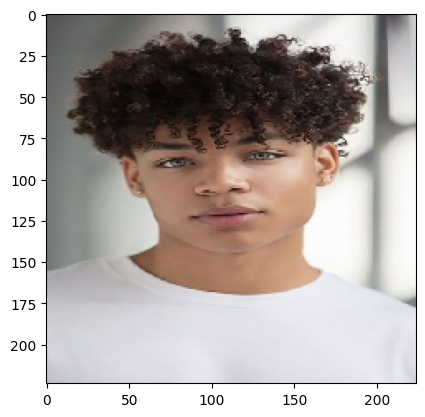

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 811ms/step
Curly Hair


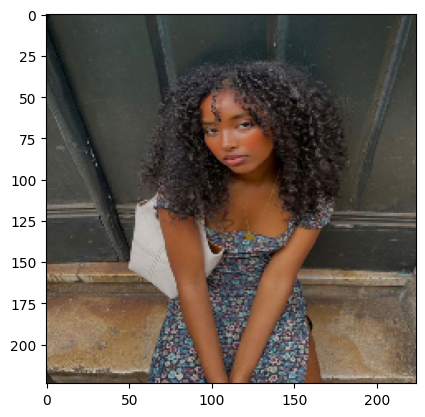

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 618ms/step
Curly Hair


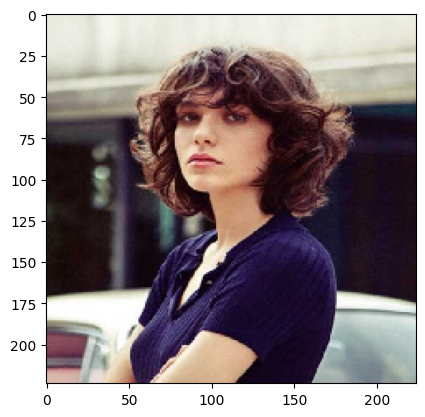

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step
Curly Hair


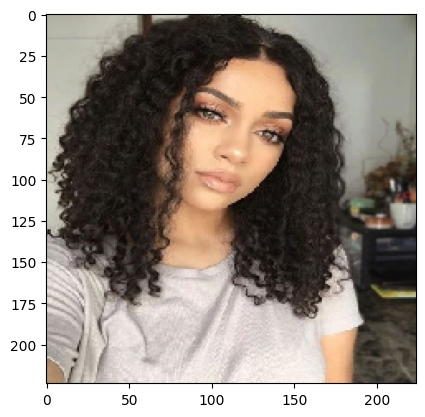

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step
Curly Hair


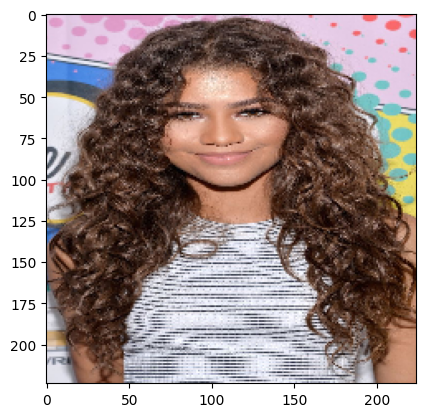

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
Curly Hair
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 810ms/step
Curly Hair


In [33]:
path = "D:/faceshapes in csv/hairtype/test_data/Curly Hair"

for img in os.listdir(path):
    img_path = os.path.join(path, img)
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.show()
    
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    images = np.vstack([x])
    pred = model.predict(images, batch_size=1) 

    if pred[0][0] > 0.5:
        print("Curly Hair")
    elif pred[0][1] > 0.5:
        print("Straight Hair")
    elif pred[0][2] > 0.5:
        print("Wavy Hair")
    else:
        print("Unknown")

In [34]:
model.save("hairtype-finetune.h5")